In [32]:
import json
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from collections import Counter

In [97]:
import os
import sys
import argparse
import torch

sys.path.append(os.getcwd())

# import src.data.data as data
import src.data.config as cfg
import src.interactive.functions as interactive

import json
import random

import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  

In [99]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
  
# # choose some words to be stemmed 
# words = ["program", "programs", "programer", "programing", "programers"] 
  
# for w in words: 
#     print(w, " : ", ps.stem(w)) 

In [3]:
s = "string. With. Punctuation?" # Sample string 
s.translate(str.maketrans('', '', string.punctuation))

'string With Punctuation'

In [4]:
example_sent = "This is a sample sentence, showing off the stop words filtration."
stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(example_sent) 
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  

In [5]:
# DUMP_FILE = '../../data/personachat_self_original_comet.json'
DUMP_FILE = '../../data/personachat_self_original_comet_validation.json'  # ** VALIDATION SPLIT ONLY

In [6]:
def load_data(dump_fname):
    annotated_data = json.load(open(dump_fname,'r'))
    return annotated_data

In [7]:
annotated_data = load_data(DUMP_FILE)

In [8]:
annotated_data.keys()

dict_keys(['valid'])

In [9]:
split = 'valid'

In [10]:
len(annotated_data), len(annotated_data[split]), annotated_data[split][0].keys()

(1, 1000, dict_keys(['personality', 'utterances', 'coment_annotation']))

In [11]:
# annotated_data['train']

In [12]:
annotated_data[split][0]['coment_annotation']

[{'sent': 'i read twenty books a year .',
  'comet': {'oEffect': {'event': 'i read twenty books a year .',
    'effect_type': 'oEffect',
    'beams': ['none',
     'they get a good grade',
     'wants to read more',
     'they learn about the books',
     'they learn about the book']},
   'oReact': {'event': 'i read twenty books a year .',
    'effect_type': 'oReact',
    'beams': ['none', 'happy', 'interested', 'impressed', 'proud']},
   'oWant': {'event': 'i read twenty books a year .',
    'effect_type': 'oWant',
    'beams': ['none',
     'to teach them more',
     'to read more books',
     'to read more',
     'to teach them']},
   'xAttr': {'event': 'i read twenty books a year .',
    'effect_type': 'xAttr',
    'beams': ['intelligent', 'studious', 'intellectual', 'smart', 'educated']},
   'xEffect': {'event': 'i read twenty books a year .',
    'effect_type': 'xEffect',
    'beams': ['gains knowledge',
     'learns a lot',
     'learns something new',
     'none',
     'learns 

In [13]:
len(annotated_data[split][0]['utterances']), annotated_data[split][0]['utterances'][0]

(8,
 {'candidates': ['oh really ? i am actually in high school and i am graduating as class of 2019 !',
   "that's an interesting choice . i'd have to pick french fries",
   'i just got a pet fish for my 18th birthday yesterday from my parents .',
   'yeah , well what about you ?',
   'my favorite watch is the rolex ? what is yours ?',
   "what is in spain that's so interesting",
   "i don't like clowns . they are scary to a kid like me",
   'poetry . roses are red . violet are . . . ?',
   'my father is a member of the army , served for 10 years now .',
   'oh i like mexican food , but my favorite food are cheeseburgers',
   'hey there , are you a mother ?',
   "it sure is . i'd like to see more of the city though .",
   'it is not so fun i have 2 friend who speak a different langues',
   "i'd like some honey though . do you sell it ?",
   'i am a recovering heavy drinker . full time . how about you ?',
   'hi ! i have three kids . how many do you have ?',
   'awesome ! i own 2 dogs ,

In [14]:
annotated_data[split][0]['utterances'][1]

{'candidates': ['why have you not sent help ? ! the scorpions are stinging my legs ! ree ! ! ! ! ! ! !',
  'that is great i am expecting twins in two months . will these be your first kids ?',
  'do you live on a farm or ranch ?',
  'hi how are you doing tonight i am fine .',
  "i'd love to see her do that .",
  "i don't . but i am so glad you do something that brings you joy",
  'it is hard , buy my dog keeps me company . do you have dogs ?',
  'sounds like a good plan , what would you like to teach ?',
  'i like rap music and i also produce for music artists .',
  'where do you work ?',
  'i broke my arm so i can not drink coffee',
  "i meant mickey . cool i've a lot of friends and love the playground . do you ?",
  'oh , yes . i wish i could skate to school . i ride the bus instead .',
  'that is my idea of heaven . i love bunnies ! i donate to a bunny charity too .',
  'i work on a freelance basis as an author , blogger and affiliate marketer . and you ?',
  'like me ? would you go

In [15]:
annotated_data[split][0]['utterances'][-1]

{'candidates': ['fun , i should take my kids out to do that . do you have a family ?',
  'they were popular in my younger days lol',
  'i sing and love rock especially while working . keeps me pumped .',
  'i mean where i come from kitties do not play with birds .',
  'i tend my rose garden and read books . i am deaf in one ear',
  'you can learn to say something nice and smart',
  'when in europe all i do is shop',
  'wow , that is exciting ! i never went to a nascar race .',
  'i live in hawaii and i work from home .',
  'hello jennifer , i am a proud dad and husband',
  'and my spouse used all the money i earned',
  'oh young people . the holidays are coming . that makes me sad .',
  'i had surgery last week and now i think of an object , and it moves !',
  'hello ! i just got back from a run . what are you up to today ?',
  'hello , my name is ally and my favourite color is orange',
  "no i didn't see that . i am excited for the new star wars though",
  'that is exciting ! do you g

In [96]:
# def process_text(s, typ='unigram', rem_stop=True):
#     s = s.lower()
#     s = s.translate(str.maketrans('', '', string.punctuation))
#     word_tokens = word_tokenize(s) 
#     filtered_sentence = word_tokens
#     if rem_stop:
#         filtered_sentence = [w for w in filtered_sentence if not w in stop_words] 
#     if typ=='bigram':
#         filtered_sentence = [ '_'.join(filtered_sentence[i:i+2]) for i in range(len(filtered_sentence)-1) ] 
#     return filtered_sentence
    

In [100]:
## ADDED STEMMING

def process_text(s, typ='unigram', rem_stop=True, do_stem=True):
    s = s.lower()
    s = s.translate(str.maketrans('', '', string.punctuation))
    word_tokens = word_tokenize(s) 
    filtered_sentence = word_tokens
    if rem_stop:
        filtered_sentence = [w for w in filtered_sentence if not w in stop_words] 
    if do_stem:
        filtered_sentence = [ps.stem(w) for w in filtered_sentence] 
    if typ=='bigram':
        filtered_sentence = [ '_'.join(filtered_sentence[i:i+2]) for i in range(len(filtered_sentence)-1) ] 
    return filtered_sentence
    

In [122]:
def get_detailed_report(history, all_personality_words, all_comet_sentences, persona_idx):
    ret = []
    for sent_h in history:
        for tok in sent_h:
            if tok in stop_words: # these are not interesting
                continue
            if tok not in all_personality_words:
                for sent in all_comet_sentences:
                    if tok in sent:
                        ret.append([tok,sent_h,sent,persona_idx])
    return ret
    

In [143]:
def process(item, typ='unigram', rem_stop=True, det_report=False, persona_idx=None, history_level=None):
    
    utterances = item['utterances']
    history = utterances[-1]['history']
    all_conversation_words = []
    all_conversation_sent = []
    for h in history:
        #print("history: ", h)
        tmp = process_text(h,typ=typ,rem_stop=rem_stop)
        all_conversation_words.extend(tmp)
        all_conversation_sent.append(tmp)
    all_conversation_words = set(all_conversation_words)

    personality = item['personality']
    all_personality_words = []
    for h in personality:
        #print("personality: ", h)
        all_personality_words.extend(process_text(h,typ=typ,rem_stop=rem_stop))
    all_personality_words = set(all_personality_words)
    
    coment_annotation = item['coment_annotation']
    all_comet_words = []
    all_comet_sentences = [] # stores list of processed sentences
    for h in coment_annotation:
        comet = h['comet']
        for _,value in comet.items():
            for sent in value['beams']:
                #print('coment_annotation: ',sent)
                if sent.strip() == 'none':
                    continue
                tmp = process_text(sent,typ=typ,rem_stop=rem_stop)
                all_comet_sentences.append(tmp)
                all_comet_words.extend(tmp)
    all_comet_words = set(all_comet_words)
    
    detailed_report=None
    if det_report:
        detailed_report = get_detailed_report(all_conversation_sent, 
                                              all_personality_words, 
                                              all_comet_sentences,
                                              persona_idx)
    

    conv_personality_overlap = len(all_conversation_words.intersection(all_personality_words)) / ( len(all_conversation_words) )
    conv_comet_overlap = len(all_conversation_words.intersection(all_comet_words)) /  ( len(all_conversation_words) )

    all_extended_personality_words = all_comet_words.union(all_personality_words)
    conv_ext_personality_overlap = len(all_conversation_words.intersection(all_extended_personality_words)) /  ( len(all_conversation_words) )

    additional_word_set = all_conversation_words.intersection(all_comet_words) - all_conversation_words.intersection(all_personality_words)

    ret =  {'additional_word_set':additional_word_set, 
            'detailed_report':detailed_report,
            'conv_personality_overlap':conv_personality_overlap,
            'conv_comet_overlap':conv_comet_overlap,
            'conv_ext_personality_overlap':conv_ext_personality_overlap,
            'additional_recall':conv_ext_personality_overlap - conv_personality_overlap}
        
    if history_level is not None:
        additional_recall_list = []
        conv_personality_overlap_list = []
        for i,snt in enumerate(all_conversation_sent):
            all_conversation_wordsi = []
            for j in range(max(0,i-2),i):
                all_conversation_wordsi += all_conversation_sent[j]
            all_conversation_wordsi = set(all_conversation_wordsi)
            all_personality_wordsi = all_personality_words.difference(all_conversation_wordsi)
            all_extended_personality_wordsi = all_extended_personality_words.difference(all_conversation_wordsi)
            all_conversation_senti = set(all_conversation_sent[i])
            if len(all_conversation_senti) == 0:
                continue
            conv_personality_overlapi = len(all_conversation_senti.intersection(all_personality_wordsi)) / ( len(all_conversation_senti) )
            conv_comet_overlapi = len(all_conversation_senti.intersection(all_comet_words)) /  ( len(all_conversation_senti) )
            conv_ext_personality_overlapi = len(all_conversation_senti.intersection(all_extended_personality_wordsi)) /  ( len(all_conversation_senti) )
            additional_recall_list.append(conv_ext_personality_overlap - conv_personality_overlap)
            conv_personality_overlap_list.append(conv_personality_overlap)
        #print(additional_recall_list)
        ret.update({'additional_recall_list':np.mean(additional_recall_list)})
        ret.update({'conv_personality_overlap_list':np.mean(conv_personality_overlap_list)})
    
    #print("additional_word_set = ", additional_word_set)
    #print(conv_personality_overlap, conv_comet_overlap)
    
    return ret
    

In [144]:
process(annotated_data[split][0], history_level='true')

{'additional_word_set': {'done',
  'get',
  'good',
  'help',
  'love',
  'well',
  'work'},
 'detailed_report': None,
 'conv_personality_overlap': 0.13793103448275862,
 'conv_comet_overlap': 0.22413793103448276,
 'conv_ext_personality_overlap': 0.25862068965517243,
 'additional_recall': 0.12068965517241381,
 'additional_recall_list': 0.12068965517241376,
 'conv_personality_overlap_list': 0.13793103448275862}

In [104]:
#additionalrecall possible --- unigrams without stopwordss

In [145]:
all_ret_split = []
for idx,datum in enumerate(annotated_data[split]):
    all_ret_split.append(process(datum,persona_idx=idx,history_level='true'))
len(all_ret_split)

1000

In [146]:
additional_recall_vals_split = [val['additional_recall'] for val in all_ret_split]
scipy.stats.describe(additional_recall_vals_split)

DescribeResult(nobs=1000, minmax=(0.0, 0.28888888888888886), mean=0.12205537652406516, variance=0.0020933962532690923, skewness=0.2589053238261429, kurtosis=-0.05617819779744426)

(array([ 12.,  61., 159., 231., 233., 164.,  92.,  36.,   9.,   3.]),
 array([0.        , 0.02888889, 0.05777778, 0.08666667, 0.11555556,
        0.14444444, 0.17333333, 0.20222222, 0.23111111, 0.26      ,
        0.28888889]),
 <a list of 10 Patch objects>)

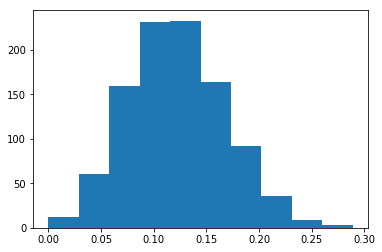

In [147]:
plt.hist(additional_recall_vals_split)

In [140]:
#### new:

In [148]:
additional_recall_vals_split_hist = [val['additional_recall_list'] for val in all_ret_split]
scipy.stats.describe(additional_recall_vals_split)

DescribeResult(nobs=1000, minmax=(0.0, 0.28888888888888886), mean=0.12205537652406516, variance=0.0020933962532690923, skewness=0.2589053238261429, kurtosis=-0.05617819779744426)

In [108]:
### additional_word_set

In [109]:
additional_word_set_vals_split = []
for val in all_ret_split:
    additional_word_set_vals_split.extend( val['additional_word_set'] )
ctr = sorted( Counter(additional_word_set_vals_split).items(),key=lambda x:-x[1] )
ctr[:44], ctr[-22:]

([('good', 474),
  ('get', 361),
  ('like', 331),
  ('go', 329),
  ('fun', 237),
  ('love', 225),
  ('lot', 214),
  ('well', 210),
  ('time', 151),
  ('make', 148),
  ('thank', 117),
  ('work', 114),
  ('job', 103),
  ('new', 97),
  ('know', 96),
  ('play', 92),
  ('interest', 88),
  ('eat', 82),
  ('enjoy', 81),
  ('money', 69),
  ('help', 68),
  ('peopl', 67),
  ('excit', 65),
  ('home', 57),
  ('school', 51),
  ('nice', 50),
  ('learn', 50),
  ('live', 50),
  ('see', 46),
  ('happi', 45),
  ('person', 44),
  ('listen', 43),
  ('thing', 43),
  ('take', 43),
  ('teach', 40),
  ('young', 40),
  ('kid', 40),
  ('better', 40),
  ('music', 38),
  ('friend', 37),
  ('kind', 36),
  ('also', 35),
  ('hard', 34),
  ('watch', 34)],
 [('photo', 1),
  ('way', 1),
  ('lost', 1),
  ('figur', 1),
  ('histori', 1),
  ('tan', 1),
  ('radio', 1),
  ('dead', 1),
  ('teacher', 1),
  ('rent', 1),
  ('unhappi', 1),
  ('album', 1),
  ('appli', 1),
  ('intellig', 1),
  ('adopt', 1),
  ('walk', 1),
  ('cake'

In [110]:
#additionalrecall possible --- bigrams with stopwords

In [111]:
all_ret_split = []
for datum in annotated_data[split]:
    all_ret_split.append(process(datum,typ='bigram',rem_stop=False))
len(all_ret_split)

1000

In [112]:
additional_recall_vals_split = [val['additional_recall'] for val in all_ret_split]
scipy.stats.describe(additional_recall_vals_split)

DescribeResult(nobs=1000, minmax=(0.0, 0.09900990099009901), mean=0.0290027873912113, variance=0.00032568528405769055, skewness=0.701902522111424, kurtosis=0.20399806468270798)

(array([150., 209., 214., 164., 116.,  83.,  35.,  20.,   6.,   3.]),
 array([0.        , 0.00990099, 0.01980198, 0.02970297, 0.03960396,
        0.04950495, 0.05940594, 0.06930693, 0.07920792, 0.08910891,
        0.0990099 ]),
 <a list of 10 Patch objects>)

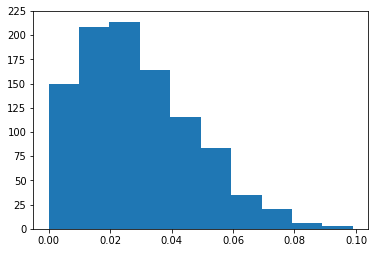

In [113]:
plt.hist(additional_recall_vals_split)

In [114]:
additional_word_set_vals_split = []
for val in all_ret_split:
    additional_word_set_vals_split.extend( val['additional_word_set'] )
ctr = sorted( Counter(additional_word_set_vals_split).items(),key=lambda x:-x[1] )
ctr[:44], ctr[-22:]

([('have_a', 223),
  ('a_lot', 196),
  ('go_to', 175),
  ('to_be', 164),
  ('lot_of', 130),
  ('to_go', 109),
  ('be_a', 102),
  ('to_get', 98),
  ('to_the', 94),
  ('to_have', 75),
  ('a_good', 71),
  ('for_a', 48),
  ('get_a', 44),
  ('listen_to', 42),
  ('to_do', 42),
  ('in_the', 40),
  ('in_a', 39),
  ('to_play', 34),
  ('of_the', 32),
  ('for_the', 31),
  ('to_make', 31),
  ('a_job', 29),
  ('is_a', 28),
  ('they_are', 28),
  ('get_to', 28),
  ('a_new', 27),
  ('like_to', 26),
  ('to_eat', 26),
  ('have_to', 22),
  ('to_school', 21),
  ('to_know', 19),
  ('on_the', 19),
  ('to_a', 17),
  ('a_dog', 16),
  ('live_in', 16),
  ('to_read', 15),
  ('to_work', 15),
  ('play_with', 15),
  ('i_like', 15),
  ('to_learn', 15),
  ('have_fun', 15),
  ('to_listen', 13),
  ('on_a', 13),
  ('not_like', 12)],
 [('from_the', 1),
  ('it_a', 1),
  ('a_doctor', 1),
  ('a_drink', 1),
  ('birthday_cake', 1),
  ('the_doctor', 1),
  ('be_old', 1),
  ('they_play', 1),
  ('the_crop', 1),
  ('a_citi', 1),
 

In [115]:
### see some examples of context in which additional words are present


In [116]:
all_ret_split = []
for idx,datum in enumerate(annotated_data[split]):
    all_ret_split.append(process(datum,typ='unigram',rem_stop=False,det_report=True,persona_idx=idx))
len(all_ret_split)

1000

In [117]:
all_ret_split[0]

{'additional_word_set': {'about',
  'are',
  'at',
  'do',
  'done',
  'get',
  'good',
  'have',
  'help',
  'him',
  'is',
  'it',
  'love',
  'me',
  'the',
  'them',
  'to',
  'too',
  'well',
  'work'},
 'detailed_report': [['good',
   ['i',
    'am',
    'good',
    'i',
    'just',
    'got',
    'off',
    'work',
    'and',
    'tire',
    'i',
    'have',
    'two',
    'job'],
   ['they', 'get', 'a', 'good', 'grade'],
   0],
  ['good',
   ['i',
    'am',
    'good',
    'i',
    'just',
    'got',
    'off',
    'work',
    'and',
    'tire',
    'i',
    'have',
    'two',
    'job'],
   ['to', 'get', 'a', 'good', 'grade'],
   0],
  ['good',
   ['i',
    'am',
    'good',
    'i',
    'just',
    'got',
    'off',
    'work',
    'and',
    'tire',
    'i',
    'have',
    'two',
    'job'],
   ['to', 'get', 'a', 'good', 'job'],
   0],
  ['good',
   ['i',
    'am',
    'good',
    'i',
    'just',
    'got',
    'off',
    'work',
    'and',
    'tire',
    'i',
    'have',

In [118]:
def show_random_additional_oc_ctxt(all_ret_split, annotated_data):
    res = random.choice(all_ret_split)
    res = random.choice(res['detailed_report'])
    print(res)
    print("***history : ", annotated_data[res[-1]]['utterances'][-1]['history'])
    print("***personality: ", annotated_data[res[-1]]['personality'])
    

In [119]:
random.seed(123)
for i in range(25):
    print(i)
    show_random_additional_oc_ctxt(all_ret_split,annotated_data[split])
    print()

0
['play', ['ive', 'an', 'xbox', 'too', 'my', 'older', 'brother', 'never', 'will', 'let', 'me', 'play', 'though'], ['play', 'soccer', 'with', 'personx'], 53]
***history :  ['how are you doing today', 'great thanks . what are you doing ?', 'i am playing my favorite game', 'hat game ? i love games as well , being 13 and all .', 'no it is on xbox', "i've an xbox too . my older brother never will let me play though .", "that isn't very nice", 'no , and i cry about it whilst i am on the bus for school . very sad .', 'what do your friends think', 'they try to help me . they also help me with my math , i am terrible at that .', "i don't like it either . love music", 'i prefer soccer , but what music do you like ?', 'i like all kinds of music', 'do you like soccer like i do ? i play every weekend .', 'i play it once in a while']
***personality:  ["i'm 13 years old .", 'i ride the bus to school .', 'my brother is older than me .', 'i hate math class .', "i'm on the soccer team ."]

1
['get', ['

In [121]:
########### TODO
#

In [ ]:
# add analysis on how many words excluding prvious two turns

In [ ]:
# add analysis on how many words in previous-two + comet of previous two  compared to just previous two 